### Stock Market Prediction using Financial News and Stock Price Integration Dataset


### Import necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# modify python path to get modules in parent folder
import sys 
sys.path.append("..")

### Load Dataset

In [3]:
# load the dataset using the module in the parent folder
from src.data.load_data import load_data
df=load_data("../data/raw_analyst_ratings.csv")



read the dataset from ../data/raw_analyst_ratings.csv successfully!


In [4]:
# see our dataset
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


### Exploratory Data Analysis

In [5]:
# see the columns
df.columns


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [6]:
df.dtypes # see the datatypes

Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object

In [7]:
df.isna().sum() # ckeck if there are missing values

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [9]:
# Drop unnecessary column
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


#### Obtain basic statistics for headline lengths

In [10]:
# create column for headline length
df["headline_length"]=df["headline"].apply(len)
df.headline_length.head()

0    39
1    42
2    29
3    44
4    87
Name: headline_length, dtype: int64

Text(0, 0.5, 'Frequency')

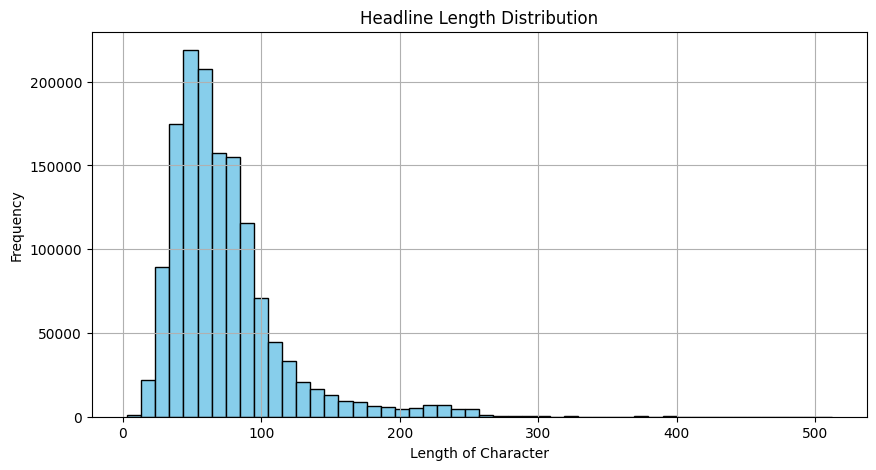

In [11]:
# visualize the headline length distribution
plt.figure(figsize=(10,5))
df.headline_length.hist(bins=50,color="skyblue",edgecolor="black")
plt.title("Headline Length Distribution")
plt.xlabel("Length of Character")
plt.ylabel("Frequency")

In [12]:
# view discriptive statistics
df.headline_length.describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

#### Count number of articles per publisher

In [13]:
publisher_counts=df.publisher.value_counts()
publisher_counts

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

Text(0, 0.5, 'Number')

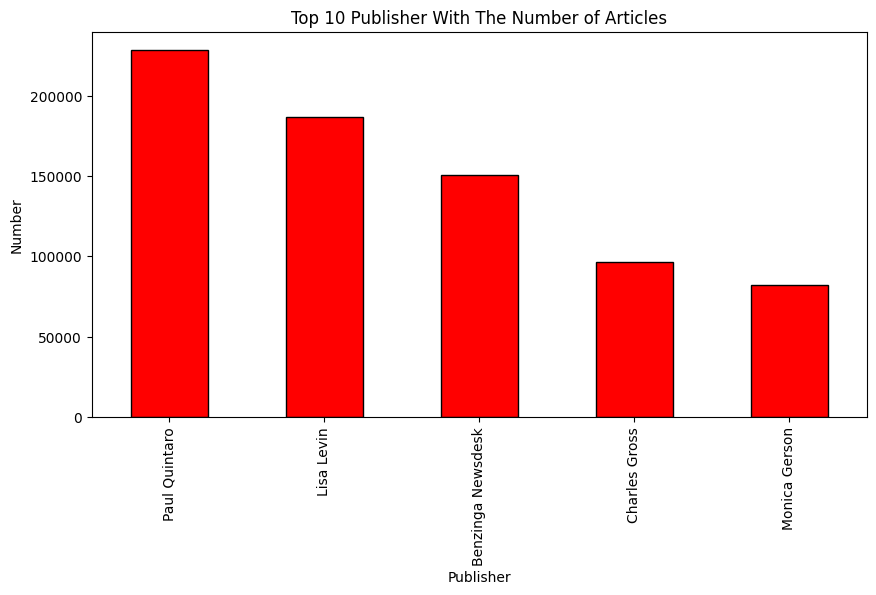

In [14]:
# visualize the top 10 publisher
top_10_publisher=df['publisher'].value_counts().head()
plt.figure(figsize=(10,5))
top_10_publisher.plot(kind='bar',color='red',edgecolor='black')
plt.title("Top 10 Publisher With The Number of Articles")
plt.xlabel("Publisher")
plt.ylabel("Number")



#### Analyze Publication Date For Trends

In [15]:
# convert date to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")
# check result
print(df["date"].dtype)
df.head()


datetime64[ns, UTC-04:00]


,headline,url,publisher,date,stock,headline_length
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [16]:
# count the number of articles per day
articles_per_day=df.groupby(df["date"].dt.date).size()
articles_per_day

date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Length: 2528, dtype: int64

Text(0, 0.5, 'Number of Articles')

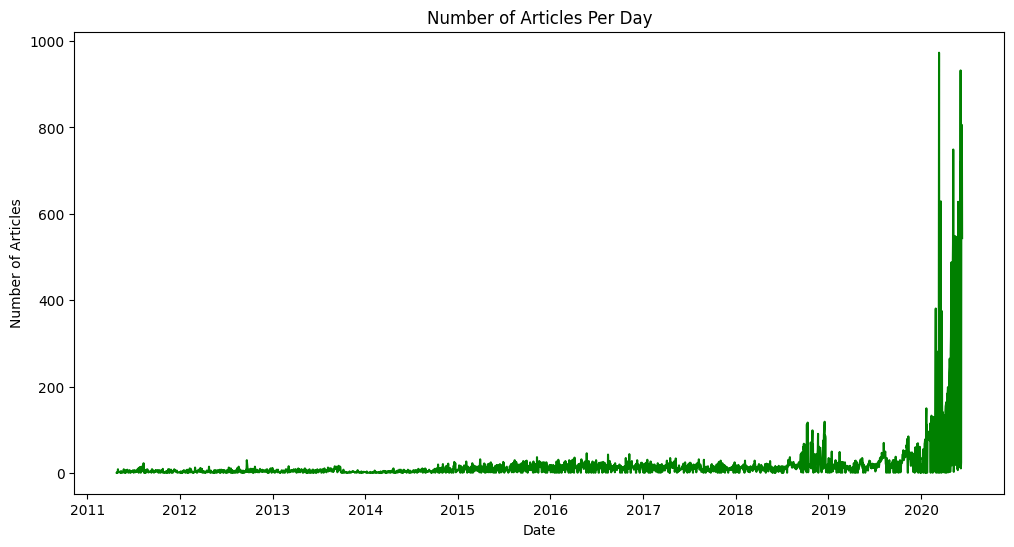

In [17]:
# Articles per day(daily) distrubution
plt.figure(figsize=(12,6))
articles_per_day.plot(color='green')
plt.title("Number of Articles Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Articles")

In [18]:
# count the number of articles per month
articles_per_month=df.groupby(df["date"].dt.month).size()
articles_per_month

date
1.0      3068
2.0      4091
3.0      6391
4.0      6468
5.0     11363
6.0      7968
7.0      2131
8.0      2858
9.0      2417
10.0     3079
11.0     3210
12.0     2943
dtype: int64

Text(0, 0.5, 'Number Of Articles')

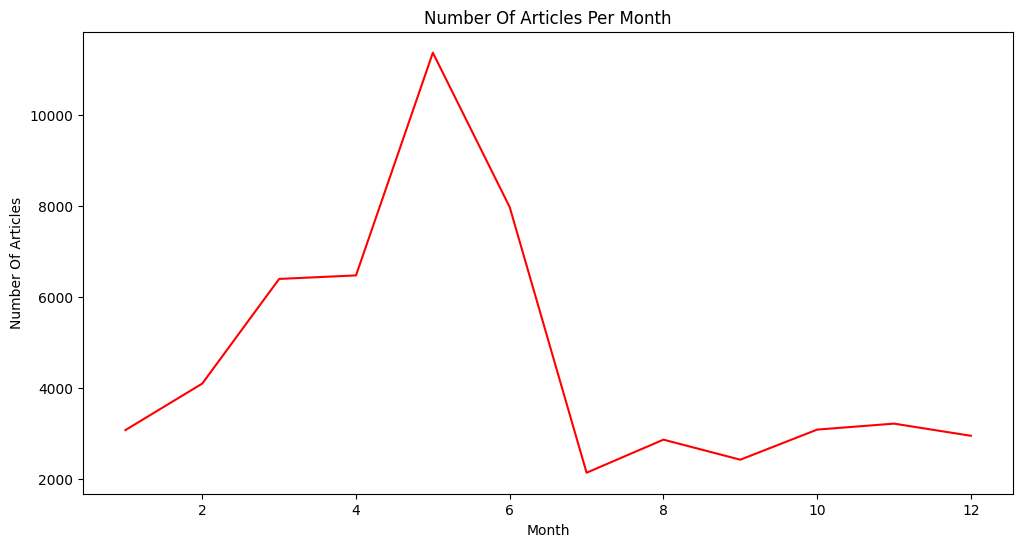

In [19]:
# Ariticles per month
plt.figure(figsize=(12,6))
articles_per_month.plot(color='red')
plt.title("Number Of Articles Per Month")
plt.xlabel("Month")
plt.ylabel("Number Of Articles")


In [20]:
# count the number of articles per weekday
articles_per_weekday=df.groupby(df["date"].dt.day_name()).size()
articles_per_weekday

date
Friday        9381
Monday       10322
Saturday       267
Sunday         436
Thursday     12688
Tuesday      11002
Wednesday    11891
dtype: int64

Text(0, 0.5, 'Number')

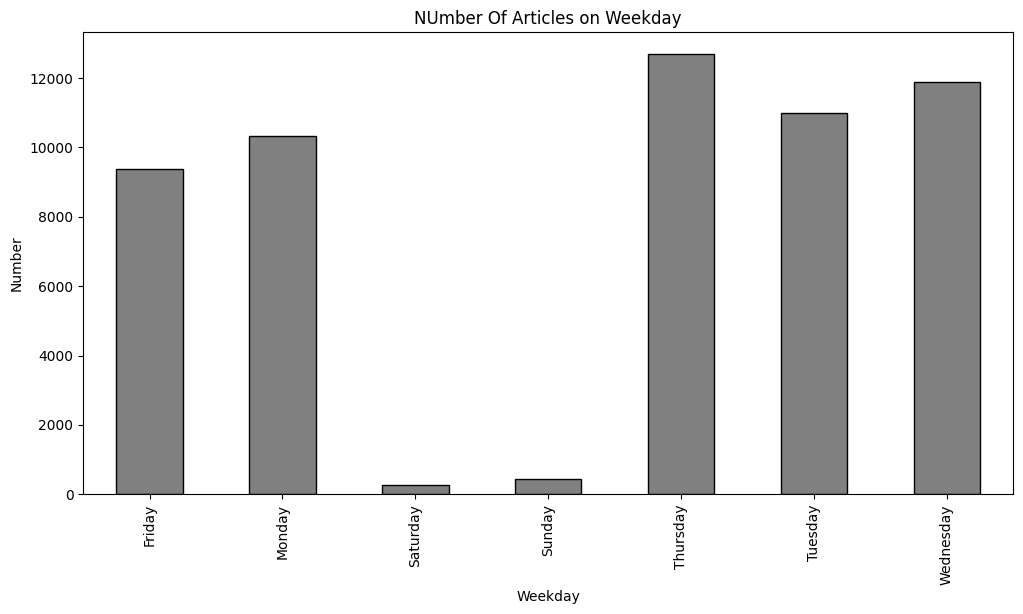

In [21]:
# visualize weekday Number of Articles
plt.figure(figsize=(12,6))
articles_per_weekday.plot(kind='bar',color="grey",edgecolor="black")
plt.title("NUmber Of Articles on Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number")


### Text Analysis/Text Modeling

#### Import Libraries

In [22]:
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

#### Download Stopwords

In [23]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UserK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### clean Headlines

In [24]:
# function to remove punctuation, number and convert to lower case
def clean_text(text):
    text=str(text).lower() # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    return text

# apply to our headline
df["clean_headline"]=df.headline.apply(clean_text)




In [25]:
df.clean_headline.head()

0                 stocks that hit week highs on friday
1              stocks that hit week highs on wednesday
2                           biggest movers from friday
3              stocks moving in fridays midday session
4    b of a securities maintains neutral on agilent...
Name: clean_headline, dtype: object

In [26]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english')) #convert to set for faster membership test

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UserK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Tokenize and Remove Stopwords 

In [27]:
def tokenize(text):
    tokens=text.split() # split with white space
    tokens=[word for word in tokens if word not in stop_words]
    return tokens

# apply to our cleaned headlines
df['tokens']=df['clean_headline'].apply(tokenize)

In [28]:
df.tokens.head()

0                   [stocks, hit, week, highs, friday]
1                [stocks, hit, week, highs, wednesday]
2                            [biggest, movers, friday]
3           [stocks, moving, fridays, midday, session]
4    [b, securities, maintains, neutral, agilent, t...
Name: tokens, dtype: object

#### Find the Frequent Words

In [30]:
# flatten all token lists
all_tokens=[token for sublist in df['tokens'] for token in sublist ]
# count frequency
keyword_counts=Counter(all_tokens)
top_keywords=keyword_counts.most_common(20)
top_keywords

[('vs', 162146),
 ('stocks', 161868),
 ('q', 157878),
 ('est', 140605),
 ('eps', 128929),
 ('shares', 114209),
 ('reports', 108707),
 ('update', 91680),
 ('market', 90880),
 ('earnings', 87185),
 ('sales', 79526),
 ('top', 78678),
 ('pt', 73054),
 ('week', 67669),
 ('announces', 66529),
 ('price', 64232),
 ('buy', 64060),
 ('downgrades', 61942),
 ('trading', 61158),
 ('benzingas', 57985)]

#### Find Two Word Phrases(bigrams)

In [31]:
# count bigrams(two-word phrases)
vectorizer=CountVectorizer(ngram_range=(2,2),stop_words='english')
x=vectorizer.fit_transform(df['clean_headline'])
bigrams=x.sum(axis=0)
bigram_freq = [(word, bigrams[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)
print(bigram_freq[:20])

[('vs est', np.int64(129339)), ('eps vs', np.int64(70250)), ('reports eps', np.int64(51208)), ('price target', np.int64(47266)), ('stocks moving', np.int64(40072)), ('market update', np.int64(33089)), ('earnings scheduled', np.int64(32055)), ('initiates coverage', np.int64(28980)), ('raises pt', np.int64(27242)), ('companies trading', np.int64(23170)), ('trading higher', np.int64(22939)), ('adj eps', np.int64(21708)), ('premarket session', np.int64(21670)), ('sales vs', np.int64(21629)), ('benzingas upgrades', np.int64(21115)), ('trading lower', np.int64(20096)), ('stocks hit', np.int64(20031)), ('hit week', np.int64(19971)), ('new week', np.int64(19288)), ('option alert', np.int64(18226))]


### Publisher Analysis(For more insights)

Text(0, 0.5, 'Number of articles(log scale)')

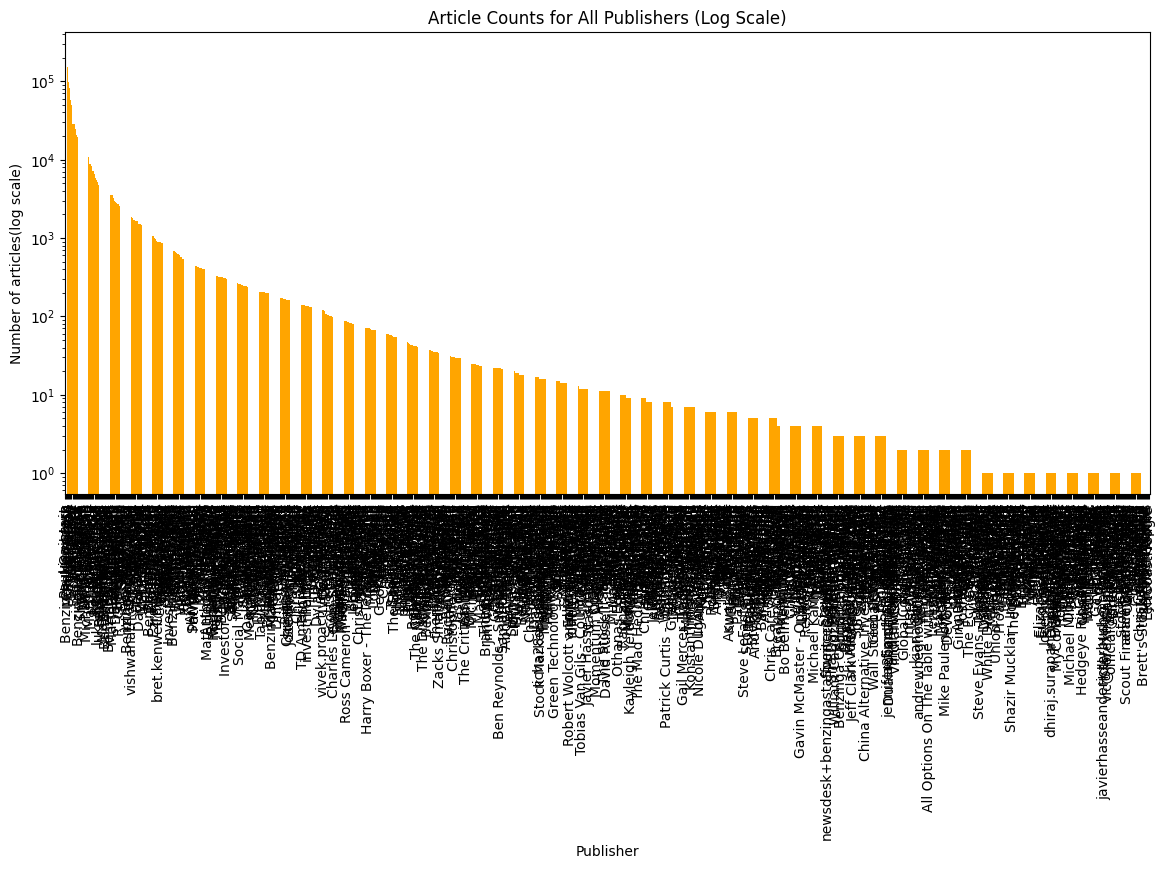

In [34]:
# Log-scale for all publisher
plt.figure(figsize=(14,6))
publisher_counts.plot(kind='bar',logy=True,figsize=(14,6), color='orange')
plt.title("Article Counts for All Publishers (Log Scale)")
plt.xlabel("Publisher")
plt.ylabel("Number of articles(log scale)")

##### If publisher names are email addresses

In [36]:
# Extract Domain frim the email
df['domain']=df['publisher'].str.extract(r'@([A-Za-z0-9.-]+)')
# count articles per domain
domain_counts=df.domain.value_counts().head(20)
domain_counts


domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64